<a href="https://colab.research.google.com/github/ranesh88/ranesh_data-science/blob/master/Spam_sms_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
# one time
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
punkt = list(punctuation)
bad_tokens = stop + punkt

In [ ]:
df = pd.read_csv("/content/spam.csv")

In [ ]:
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


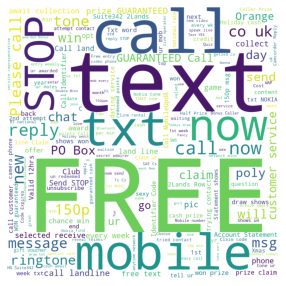

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(''.join(df[df["Category"]=="spam"]["Message"]))
  
plt.figure(figsize = (5,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

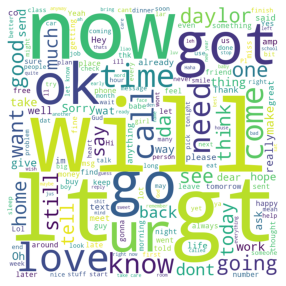

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(''.join(df[df["Category"]=="not spam"]["Message"]))
  
plt.figure(figsize = (5,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [ ]:
# for spam emails and sms, include numbers and capital letters
def clean_text(text):
    
    text = text.lower()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    final_tokens = [t for t in word_tokens if t not in bad_tokens]
    return " ".join(final_tokens)

In [ ]:
df["Message"] = df["Message"].apply(clean_text)

In [ ]:
df["Message"]

0       go jurong point available bugis n great world ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                          ü b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [ ]:
X = df["Message"]
y = df["Category"]

In [ ]:
y.value_counts()

not spam    4825
spam         747
Name: Category, dtype: int64

In [ ]:
def encode(x):
    index = {"spam":1,"not spam":0}
    return index[x]

In [ ]:
y = y.apply(encode)

In [ ]:
y.value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [ ]:
cv = CountVectorizer()

In [ ]:
X_train_cv = cv.fit_transform(X_train).toarray()

In [ ]:
X_test_cv = cv.transform(X_test).toarray()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_cv,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt.predict(X_test_cv)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1442
           1       0.88      0.82      0.85       230

    accuracy                           0.96      1672
   macro avg       0.92      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
## TF-IDF

In [ ]:
tf = TfidfVectorizer()

In [ ]:
# X_train_tf = tf.fit_transform(X_train) is enough
X_train_tf = tf.fit_transform(X_train).toarray()

In [ ]:
X_test_tf = tf.transform(X_test).toarray()

In [ ]:
dt2 = DecisionTreeClassifier()

In [ ]:
dt2.fit(X_train_tf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt2.predict(X_test_tf)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1442
           1       0.87      0.80      0.84       230

    accuracy                           0.96      1672
   macro avg       0.92      0.89      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
#cv = CountVectorizer(stopwords="english")
#cv = CountVectorizer(ngram_range=(1,2))

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(2, activation="relu", input_shape=(X_train_cv.shape[1],)),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X_train_ss = ss.fit_transform(X_train_cv)
X_test_ss = ss.transform(X_test_cv)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
model.fit(X_train_ss, y_train, epochs=30, batch_size=20)

Epoch 1/30
195/195 [==============================] - 0s 2ms/step - loss: 0.5594
Epoch 2/30
195/195 [==============================] - 0s 2ms/step - loss: 0.3162
Epoch 3/30
195/195 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 4/30
195/195 [==============================] - 0s 3ms/step - loss: 0.2336
Epoch 5/30
195/195 [==============================] - 0s 2ms/step - loss: 0.1968
Epoch 6/30
195/195 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 7/30
195/195 [==============================] - 1s 3ms/step - loss: 0.1458
Epoch 8/30
195/195 [==============================] - 0s 2ms/step - loss: 0.1343
Epoch 9/30
195/195 [==============================] - 0s 2ms/step - loss: 0.1251
Epoch 10/30
195/195 [==============================] - 0s 2ms/step - loss: 0.1168
Epoch 11/30
195/195 [==============================] - 0s 2ms/step - loss: 0.1108
Epoch 12/30
195/195 [==============================] - 0s 2ms/step - loss: 0.1051
Epoch 13/30
195/195 [====

In [ ]:
y_pred = model.predict(X_test_ss)

In [ ]:
import numpy as np

In [ ]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1442
           1       0.78      0.86      0.82       230

    accuracy                           0.95      1672
   macro avg       0.88      0.91      0.89      1672
weighted avg       0.95      0.95      0.95      1672



In [ ]:
# MultinomialNB
# NN with mini-batch